# Simulation of Recombinant Protein Expression
***

# Introduction

This notebook guides you through a typical biotechnology project with the goal to overexpress a recombinant protein. In biotechnology any expressed protein needs to be synthesized with a minimum rate in order to be economically competetive. This introduction is followed by the tasks to be performed in the virtual lab to find out how to maximize the expression rate of the target protein. The results are then evaluated and assessed.    
The laboratory workflow includes at first the necessary preparations and then strain characterization cultivations, experiments for promoter sequence selection and finally the experiment to measure the achieved expression rate.

# Laboratory Tasks

In this section all aspects of the laboratory are handled. As in every laboratory you only have a limited amount of resources. This means, for example, that the money available for the experiments and the required personnel, material and space are limited. You have a total of 50 such resources at your disposal.

## Workflow

**1. Preparations for the experiments**
 
*1.1 Set-up your laboratory*    
*1.2 Choose your host organism*
 
**2. Experiments**
 
*2.1 Strain characterization cultivations*     
*2.2 Promoter sequence selection*    
*2.3 Measurement of the expression rate*


'''better transition still needs to be created, maybe some pictures of the organisms or a laboratory'''

## 1. Preparations for the experiments

### 1.1 Set-up your laboratory
To get started with the experiments, you need to set up your laboratory in such a way that all the necessary tools and the equipment, the different media, other materials and everything else important you need are available.

In [1]:
# Loading ofimportant functionalities for the notebook:
# Loading numpy, a library fo manipulation of numbers:
import numpy as np
# Loading matplotlib, a library for visualization:
import matplotlib.pyplot as plt
%matplotlib inline

# Initialization, loading of all laboratory functionalities and stored models and information of the organisms:
from BioLabSimFun import Mutant

### 1.2 Choose your host organism
Choosing your biotech-host is extremely simple: Just type the name of your favorite one into the 'Mutant'-command. Your company gives you two organisms, namely *E. coli* (abbr. Ecol) and *P. putida* (abbr. Pput). Use the abbreviation for the selection.    
In the following all characteristics and models of your organism are thereby stored under 'myhost'. With the help of 'myhost', all experiments are carried out (in the form 'myhost.experiment'). In addition, all generated measurement results, stored information and the remaining resources can be displayed.

In [7]:
myhost = Mutant('Ecol')
# host organism and remaining resources are displayed:
myhost.show_BiotechSetting()

Host: Ecol
Resources: 50
{'var_Host': 'Ecol', 'var_Resources': 50, 'var_Library': {}, '_Mutant__InflProStreng': 32, '_Mutant__OptTemp': 34, '_Mutant__OptPrLen': 25, '_Mutant__BiomassMax': 100}


## 2. Experiments

### 2.1 Strain characterization cultivations
Your organization has a strain similar to what you wanted, but slightly different. No one knows what the optimal cultivation conditions are. The only information you got from your organization is that the two available organisms are mesophilic bacteria. You can find out the range of temperatures suitable for growth on the following website (excerpt from the book "Biotechnology"):    
[Schmid, Rolf D., and Claudia Schmidt-Dannert. Biotechnology: An illustrated primer. John Wiley & Sons, 2016.](https://application.wiley-vch.de/books/sample/3527335153_c01.pdf)  
Find out the optimal growth temperature by cultivating your strain at different temperatures and calculating the growth rates based on the measured biomass concentrations. It might be helpful to have biological replicates for further data processing later on, but be aware that each cultivation costs resources.     
The biomass concentrations are automatically displayed in an Excel file after all experiments have been performed. If you want to do another set of experiments afterwards, or if you want to repeat individual experiments, you should make sure that you change the ID of your set of experiments (n), otherwise results already generated may be overwritten. By default the ID has the value 1.     
You can calculate the corresponding growth rates directly in your file. If you get stuck with the calculation or are looking for an example, you will find that in the other notebook ('2-Assistance'). If an experiment should not run to the end due to any errors, you should not take the data into account when calculating the growth rate.     
Pay attention to the maximum biomass concentration that can be reached. This is the second important parameter for the final experiment by which the production rate is determined.

In [ ]:
# When you have thought about the temperatures you want to test, type them one by one into the following 'temperatures'-vector.
temperatures = np.array([23, 27, 27, 35, 35])
# temperatures = np.array([35, 35, 35])

myhost.Make_TempGrowthExp(temperatures)

# host organism and remaining resources are displayed:
myhost.show_BiotechSetting()

### 2.2 Promoter sequence selection
You need to identify the optimal promoter sequence for expression of your gene of interest. Read the following article to become an expert on sigma70 driven prokaryotic gene expression: [https://doi.org/10.3390/biom5031245](https://doi.org/10.3390/biom5031245).     
'''further general information about sigma 70 have to be added here'''      
Think of some promoters and test them, but be aware that each testing costs resources.

The total length of the promoters must be 40 nt. Apart from that the genetic distance to the reference sequence of the tool by which the promoter strength is measured should not be larger than 0.4, because the tool for this subsequent test is based on machine learning.     
The following template serves as an aid for the creation of promoter sequences that meet these conditions in order to be able to be tested:       

##### GCCCA**XXXXXX**A**X**GC**XXX**C**X**CGT**XXX**GG**XXXXXX**TGCACG

Write down your promoter sequences in an Excel sheet.
To test the sequences, you have to clone each of them, introduce the resulting construct into the organism and then perform an expression test by measuring the promoter strength.

#### 2.2.1 Cloning
First create the primers matching your promoter sequences and write them down in your Excel file. For simplification, only the forward primer must be created here and then specified during cloning. The sequences of the primers should always start at the first nucleotide of the promoter sequence. 
The deviation from the optimum primer length should not be greater than 20 % and the length should not be greater than 30 nt for cloning to work.    
Then calculate the melting temperature for each primer and write it into your Excel sheet. On the following website you will find formulas for calculating the melting temperature. A sodium concentration of 100 mM is assumed. The deviation from the optimal melting temperature should not be greater than 10 %. Note that the formulas for calculation are used to estimate the melting temperature, the optimal temperature may differ slightly.     

Formulas for calculating the melting temperature: [genelink manual](https://www.genelink.com/Literature/ps/R26-6400-MW.pdf)     

Finally perform a cloning with each pair of promoter and primer followed directly by the measurement of the promoter strength to test the expression. Each cloning experiment gets a specific ID like for exmaple : "Clone_1". This automatically designates the corresponding generated clone that contains the corresponding promoter sequence.    
If the cloning fails, because one of the mentioned necessary conditions was not fulfilled, the sequence could not be multiplied and introduced into the organism. Then the melting temperature or the total primer length for example may need to be adjusted. If you need help with this task or with the subsequent measurement of the promoter strength, you will find a template for the table to be created with an example sequence for a promoter in the other notebook ('2-Assistance').

In [8]:
'''For each cloning, the promoter sequence, the corresponding primer, the melting temperature and the name of the experiment (ID)
must be given. For simplicity, you should define these three parameters before and and save them in variable names.'''

# Here is an example, in this order the parameters must then be entered in the 'Make_Cloning'-command for the actual cloning:
Clone_ID1 = 'Clone_1'
Promoter1 =  'GCCCAXXXXXXAXGCXXXCXCGTXXXGGXXXXXXTGCACG'
Primer1 = 'CGGG...'
Tm1 = 25 # melting temperature



Clone_ID4 = 'BestEcol'
OptPromoterEcol = 'GCCCATTGACAAGGCTCTCGCGGCCAGGTATAATTGCACG'
TestPrimer4 =     'CGGGTAACTGTTCCGAGAGCGC' #CG' #G
Tm4 = 80

Clone_ID5 = 'Test5'
Promoter5 =   'GCCCATTGAGCTGTTAGCCTAAACTAGCTAAATTTGCACG'
TestPrimer5 = 'CGGGTAACTCGACAATCGGATT'

# sequence with only the regions from the publication: GCCCATTGACAAXGCXXXCXCGTXXXGGTATAATTGCACG
Clone_ID6 = 'Test6'
Promoter6 =   'GCCCATTGACAATGCATACACGTTAAGGTATAATTGCACG'
TestPrimer6 = 'CGGGTAACTGTTACGTATGTGCAA'
Tm6 = 68

# cloning:
myhost.Make_Cloning(Clone_ID6, Promoter6, TestPrimer6, Tm6)


# displays the generated clones and their properties:
myhost.show_Library()
# host organism and remaining resources are displayed:
myhost.show_BiotechSetting()

Cloning was successfull.

Clone ID: Test6
Promoter_Sequence: GCCCATTGACAATGCATACACGTTAAGGTATAATTGCACG
Promoter_GC-content: 0.425
Host: Ecol
Resources: 49


#### 2.2.2 Measurement of the promoter strength
The promoter strength says something about the strength of expression per cell. Later, it is multiplied by the growth rate and the biomass concentration in order to determine the expression rate. This rate is the product formation rate in your overall fermentation approach that should be maximized. For further information and an illustration of the context, you can look at the last section of the second '2-Assistance'-notebook.     
After successful cloning determine the promoter strength in a subsequent experiment by entering the ID of your clone into the 'Make_MeasurePromoterStrength'-command.    
Document the promoter strengths together with the automatically determined GC contents in your Excel table. You will need both later when you evaluate the results.    
If an incorrect sequence is used, for example containing typing errors, an error may occur when measuring the promoter strength and also when measuring the expression rate. The error message is: "Key Error 'X'".

In [9]:
myhost.Make_MeasurePromoterStrength(Clone_ID6)

# displays the generated clones,their properties and their performance:
myhost.show_Library()
# host organism and remaining resources are displayed:
myhost.show_BiotechSetting()


Clone ID: Test6
Promoter_Sequence: GCCCATTGACAATGCATACACGTTAAGGTATAATTGCACG
Promoter_GC-content: 0.425
Promoter_Strength: 1.22
Host: Ecol
Resources: 48


/home/ulf/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ulf/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ulf/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### 2.3 Measurement of the expression rate
Now that you have tested some promoter sequences, perform the production experiment with the best promoter sequence and use the determined optimal growth temperature (integer only) and the maximum possible biomass (integer only) that you can determine from your data. In this way you will achieve the maximum expression rate and thus the maximum yield of your product. The value for the biomass to be used should differ less than 10 % from the maximum biomass. Pass these three named parameters in this order to the 'Make_ProductionExperiment'-command.   

With the help of the 'show_TargetExpressionRate'-command you can see the minimum expression rate you should achieve with your experiment.

In [10]:
myhost.show_TargetExpressionRate()

myhost.Make_ProductionExperiment(Clone_ID6, 34, 100)

# displays the generated clones, their properties and their performance:
myhost.show_Library()
# host organism and remaining resources are displayed:
myhost.show_BiotechSetting()

At least an expression rate of 34.12 should be achieved by the production experiment.

Clone ID: Test6
Promoter_Sequence: GCCCATTGACAATGCATACACGTTAAGGTATAATTGCACG
Promoter_GC-content: 0.425
Promoter_Strength: 1.22
Expression_Temperature: 34
Expression_Biomass: 100
Expression_Rate: 30.5
Host: Ecol
Resources: 45


# Evaluation and visualization of the results

Finally, summarize your results from the laboratory workflow in a graph by plotting the promoter strengths of your promoter sequences against the respective GC contents. The promoter strength is directly proportional to the expression rate. Therefore, highlight the promoter strength of your best promoter sequence that you used in the production experiment in the plot. With the command "plot_ReferencePromoterStrength()" you can additionally display the promoter strength of a very well suited sequence in your plot to compare your results.

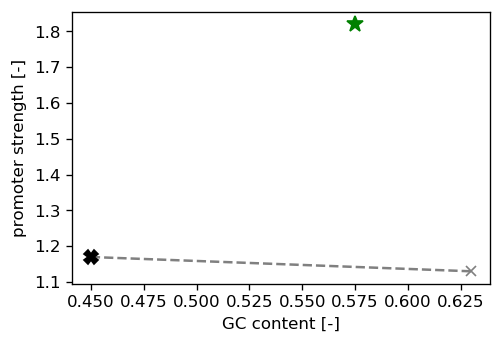

In [11]:
'''after a more detailed test during the documentation there are still places to be hidden (???)'''
# put in x your GC-contents
x = np.array([0.45, 0.63])
# put in y your promoter activity
y = np.array([1.17, 1.13])

plt.figure(figsize = (4.5,3), dpi = 120)
plt.plot(x,y, linestyle = '--', marker = 'x', color = 'grey')
# highlight best sequence
plt.plot(0.45, 1.17, marker = 'X', color = 'black', markersize = 8)

myhost.plot_ReferencePromoterStrength()

plt.xlabel('GC content [-]')
plt.ylabel('promoter strength [-]')
plt.savefig('PromoterStrength-Versus-GCcontent.png', type='png')
plt.show()